In [4]:
from src.deep import data_loaders
%load_ext autoreload
%autoreload 2

import torch
import wandb
from torch import nn
from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer
from src.deep.models import SingleMuModel3Layers, SingleMuDataSet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# define model and parameters
l_metric = nn.MSELoss()  # or L1Loss
model = SingleMuModel3Layers()
dir = '../../data/datasets/qam1024_100020/1000_samples_mu=0.001'
train_dataset, val_dataset = data_loaders.get_train_val_datasets(dir,SingleMuDataSet,train_val_ratio=0.8)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/datasets/qam1024_100020/1000_samples_mu=0.001/conf.json'

In [ ]:
wandb.init(project="Thesis", entity="yarden92")
epochs = 100
lr = 1e-3
batch_size = 128
wandb.config = {
    "learning_rate": lr,
    "epochs": epochs,
    "batch_size": batch_size
}
optim = torch.optim.Adam(model.parameters(), lr=lr)

x.shape=torch.Size([8192, 2]), y.shape=torch.Size([8192, 2])
x_np.shape=(8192, 2),y_np.shape=(8192, 2),pred_np.shape=(8192, 2)


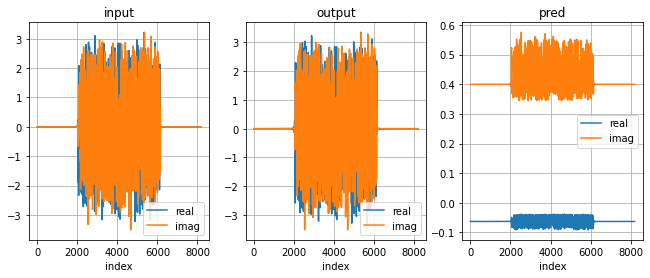

x power=1.0000869035720825
y power=1.0689479112625122
pred power=0.09


In [53]:
trainer = Trainer(train_dataset=train_dataset, val_dataset=val_dataset, model=model, l_metric=l_metric, optim=optim)

trainer.test_single_item(0, verbose=True)

In [41]:
trainer.train(num_epochs=20, verbose_level=1, _tqdm=tqdm)

  0%|          | 0/20 [00:00<?, ?it/s]

In [42]:
trainer.train_state_vec.num_epochs

20

In [43]:
trainer.save_model('../../data/saved_models')

PicklingError: Can't pickle <class 'src.deep.data_loaders.SingleMuDataSet'>: it's not the same object as src.deep.data_loaders.SingleMuDataSet

In [ ]:
trainer.plot_loss_vec()

In [ ]:
trainer.test_single_item(0,f'after {trainer.train_state_vec.num_epochs} epochs')

In [ ]:
# TODO: test ber after training

# calc original ber
trainer.compare_ber(tqdm=tqdm)